# Data Import

In [1]:
import pandas as pd

df = pd.read_csv("drug_safety.csv")

# Data Exploration

In [4]:
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [6]:
df.isnull().sum()

age                   0
sex                   0
trx                   0
week                  0
wbc                6975
rbc                6976
adverse_effects       0
num_effects           0
dtype: int64

# Data Cleaning

In [9]:
df = df.drop(columns=['wbc', 'rbc'])

In [11]:
df['sex'].value_counts()
df['trx'].value_counts()
df['adverse_effects'].value_counts()

adverse_effects
No     14567
Yes     1536
Name: count, dtype: int64

In [13]:
df['adverse_binary'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})

#  Exploratory Data Analysis (EDA)

In [16]:
df['adverse_binary'].mean()

0.09538595292802583

In [18]:
df.groupby('trx')['adverse_binary'].mean()

trx
Drug       0.095460
Placebo    0.095238
Name: adverse_binary, dtype: float64

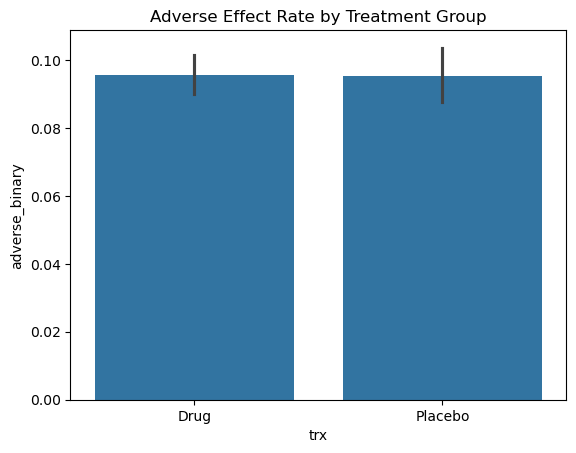

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='trx', y='adverse_binary')
plt.title("Adverse Effect Rate by Treatment Group")
plt.show()

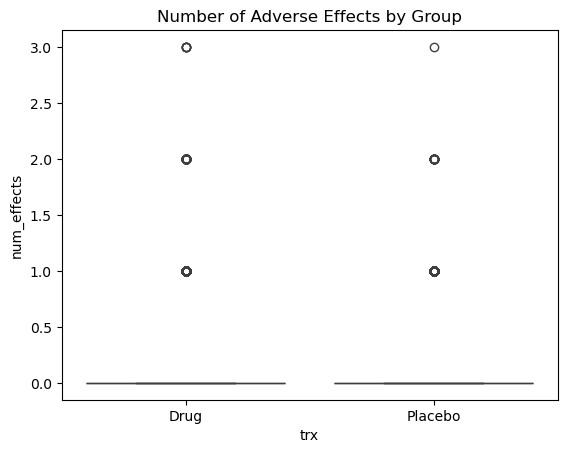

In [21]:
sns.boxplot(data=df, x='trx', y='num_effects')
plt.title("Number of Adverse Effects by Group")
plt.show()

# Statistical Analysis

In [23]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['trx'], df['adverse_binary'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2}, p-value = {p}")

Chi2 = 0.00028139786691487785, p-value = 0.9866161797847002


In [27]:
from scipy.stats import mannwhitneyu

drug = df[df['trx'] == 'Drug']['num_effects']
placebo = df[df['trx'] == 'Placebo']['num_effects']

stat, p = mannwhitneyu(drug, placebo)
print(f"Mann-Whitney U = {stat}, p-value = {p}")

Mann-Whitney U = 28844703.0, p-value = 0.9407321628349204
